In [11]:
!pip install pyspark
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install pyrolite

In [12]:
import warnings

from pyspark.sql import SparkSession
from pyspark.sql.functions import *

import matplotlib.pyplot as plt
import pandas as pd

from pyrolite.util.plot.axes import share_axes

%matplotlib inline

In [13]:
warnings.filterwarnings('ignore')

## Get Preprocessed Data

In [14]:
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
df = spark.read.option("inferSchema", "true").csv("./NYC Taxi Duration Preprocessed/*.csv", header=True)
df.printSchema()

root
 |-- vendor_id: integer (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- store_and_fwd_flag: integer (nullable = true)
 |-- trip_duration: integer (nullable = true)
 |-- distance: double (nullable = true)
 |-- week_day: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- quarter_of_year: integer (nullable = true)
 |-- hour: integer (nullable = true)



In [15]:
df.show()

+---------+---------------+----------------+---------------+-----------------+----------------+------------------+-------------+---------+--------+----+-----+---------------+----+
|vendor_id|passenger_count|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|store_and_fwd_flag|trip_duration| distance|week_day|year|month|quarter_of_year|hour|
+---------+---------------+----------------+---------------+-----------------+----------------+------------------+-------------+---------+--------+----+-----+---------------+----+
|        2|              1|      -73.982155|      40.767937|        -73.96463|       40.765602|                 0|          455|2.4444735|     Mon|2016|    3|              1|  17|
|        1|              1|      -73.980415|      40.738564|        -73.99948|        40.73115|                 0|          663|2.6599078|     Sun|2016|    6|              2|   0|
|        2|              1|       -73.97903|       40.76394|        -74.00533|       40.710087|     

## Data Visualization

### Total Trips and Passenger Count on different week days 

<Figure size 2000x1000 with 0 Axes>

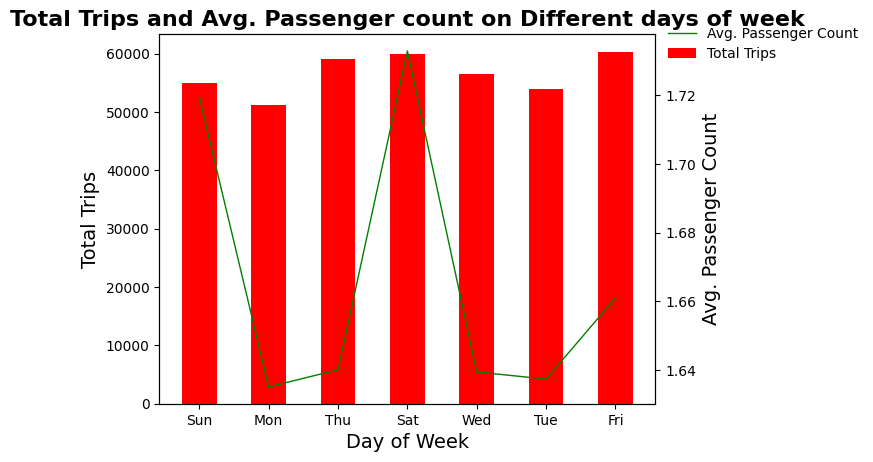

In [16]:
# Total Trips and Average Passenger Count on different week days.

df_total_trip_on_diff_week_day = df.groupBy("week_day").count()
df_avg_pass_count = df.groupBy("week_day").mean("passenger_count")

df_total_trip_pass_mean_on_diff_week_day = df_total_trip_on_diff_week_day.join(df_avg_pass_count, df_total_trip_on_diff_week_day["week_day"] == df_avg_pass_count["week_day"])

plt.figure(figsize=(20, 10), dpi=100)
fig, first_axes = plt.subplots()

x = df_total_trip_pass_mean_on_diff_week_day.toPandas().iloc[:, :1].values.flatten()
y1 = df_total_trip_pass_mean_on_diff_week_day.toPandas()['count'].values
y2 = df_total_trip_pass_mean_on_diff_week_day.toPandas()['avg(passenger_count)'].values

total_trip_duration = first_axes.bar(x, y1, color ='red',width = 0.5)

second_axes = first_axes.twinx()
mean_passenger_count = second_axes.plot(x, y2, c="green")

first_axes.set_xlabel('Day of Week', fontweight='normal', fontsize=14)
first_axes.set_ylabel('Total Trips', fontweight='normal', fontsize=14)
second_axes.set_ylabel('Avg. Passenger Count', fontweight='normal', fontsize=14)

first_axes.legend((total_trip_duration), [('Total Trips')], loc=0)
second_axes.legend((mean_passenger_count), [('Avg. Passenger Count')], loc=6)
plt.title('Total Trips and Avg. Passenger count on Different days of week', fontweight='bold', fontsize=16)
plt.show()


### Mean Distance and trip duration on different week days 

<Figure size 2000x1000 with 0 Axes>

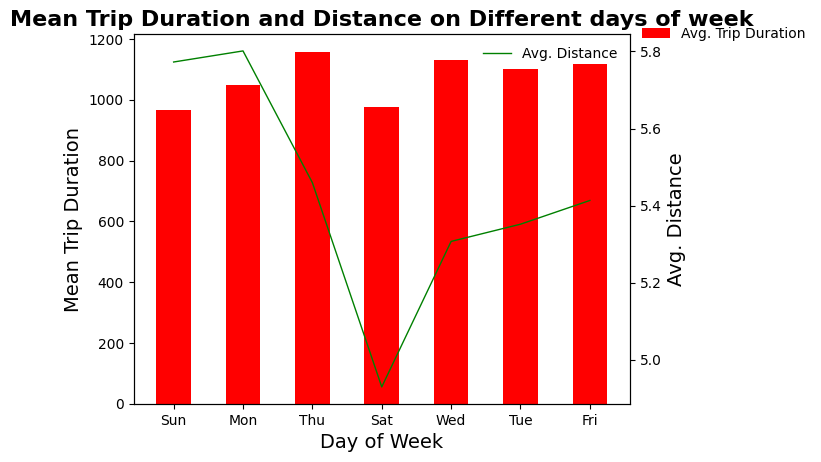

In [17]:
# Average Trip Duration and Average Distance on different week days.

df_trip_dur_on_diff_week_day = df.groupBy("week_day").mean("trip_duration")
df_mean_distance = df.groupBy("week_day").mean("distance")

df_trip_dur_distance_mean_on_diff_week_day = df_trip_dur_on_diff_week_day.join(df_mean_distance, df_trip_dur_on_diff_week_day["week_day"] == df_mean_distance["week_day"])

plt.figure(figsize=(20, 10), dpi=100)
fig, first_axes = plt.subplots()

x = df_trip_dur_distance_mean_on_diff_week_day.toPandas().iloc[:, :1].values.flatten()
y1 = df_trip_dur_distance_mean_on_diff_week_day.toPandas()['avg(trip_duration)'].values
y2 = df_trip_dur_distance_mean_on_diff_week_day.toPandas()['avg(distance)'].values

avg_trip_duration = first_axes.bar(x, y1, color ='red',width = 0.5)

second_axes = first_axes.twinx()
mean_distance = second_axes.plot(x, y2, c="green")

first_axes.set_xlabel('Day of Week', fontweight='normal', fontsize=14)
first_axes.set_ylabel('Mean Trip Duration', fontweight='normal', fontsize=14)
second_axes.set_ylabel('Avg. Distance', fontweight='normal', fontsize=14)

first_axes.legend((avg_trip_duration), [('Avg. Trip Duration')], loc=6)
second_axes.legend((mean_distance), [('Avg. Distance')], loc=0)

plt.title('Mean Trip Duration and Distance on Different days of week', fontweight='bold', fontsize=16)
plt.show()


## Distance and Trip Duration

In [18]:
# Selecting two columns

distance = df.select('distance').toPandas().values
trip_duration = df.select('trip_duration').toPandas().values

In [19]:
# Create dataframe of distance and trip_duration columns.

df_dist_trip_time = pd.DataFrame({'distance': distance.flatten(), 'trip_duration': trip_duration.flatten()})

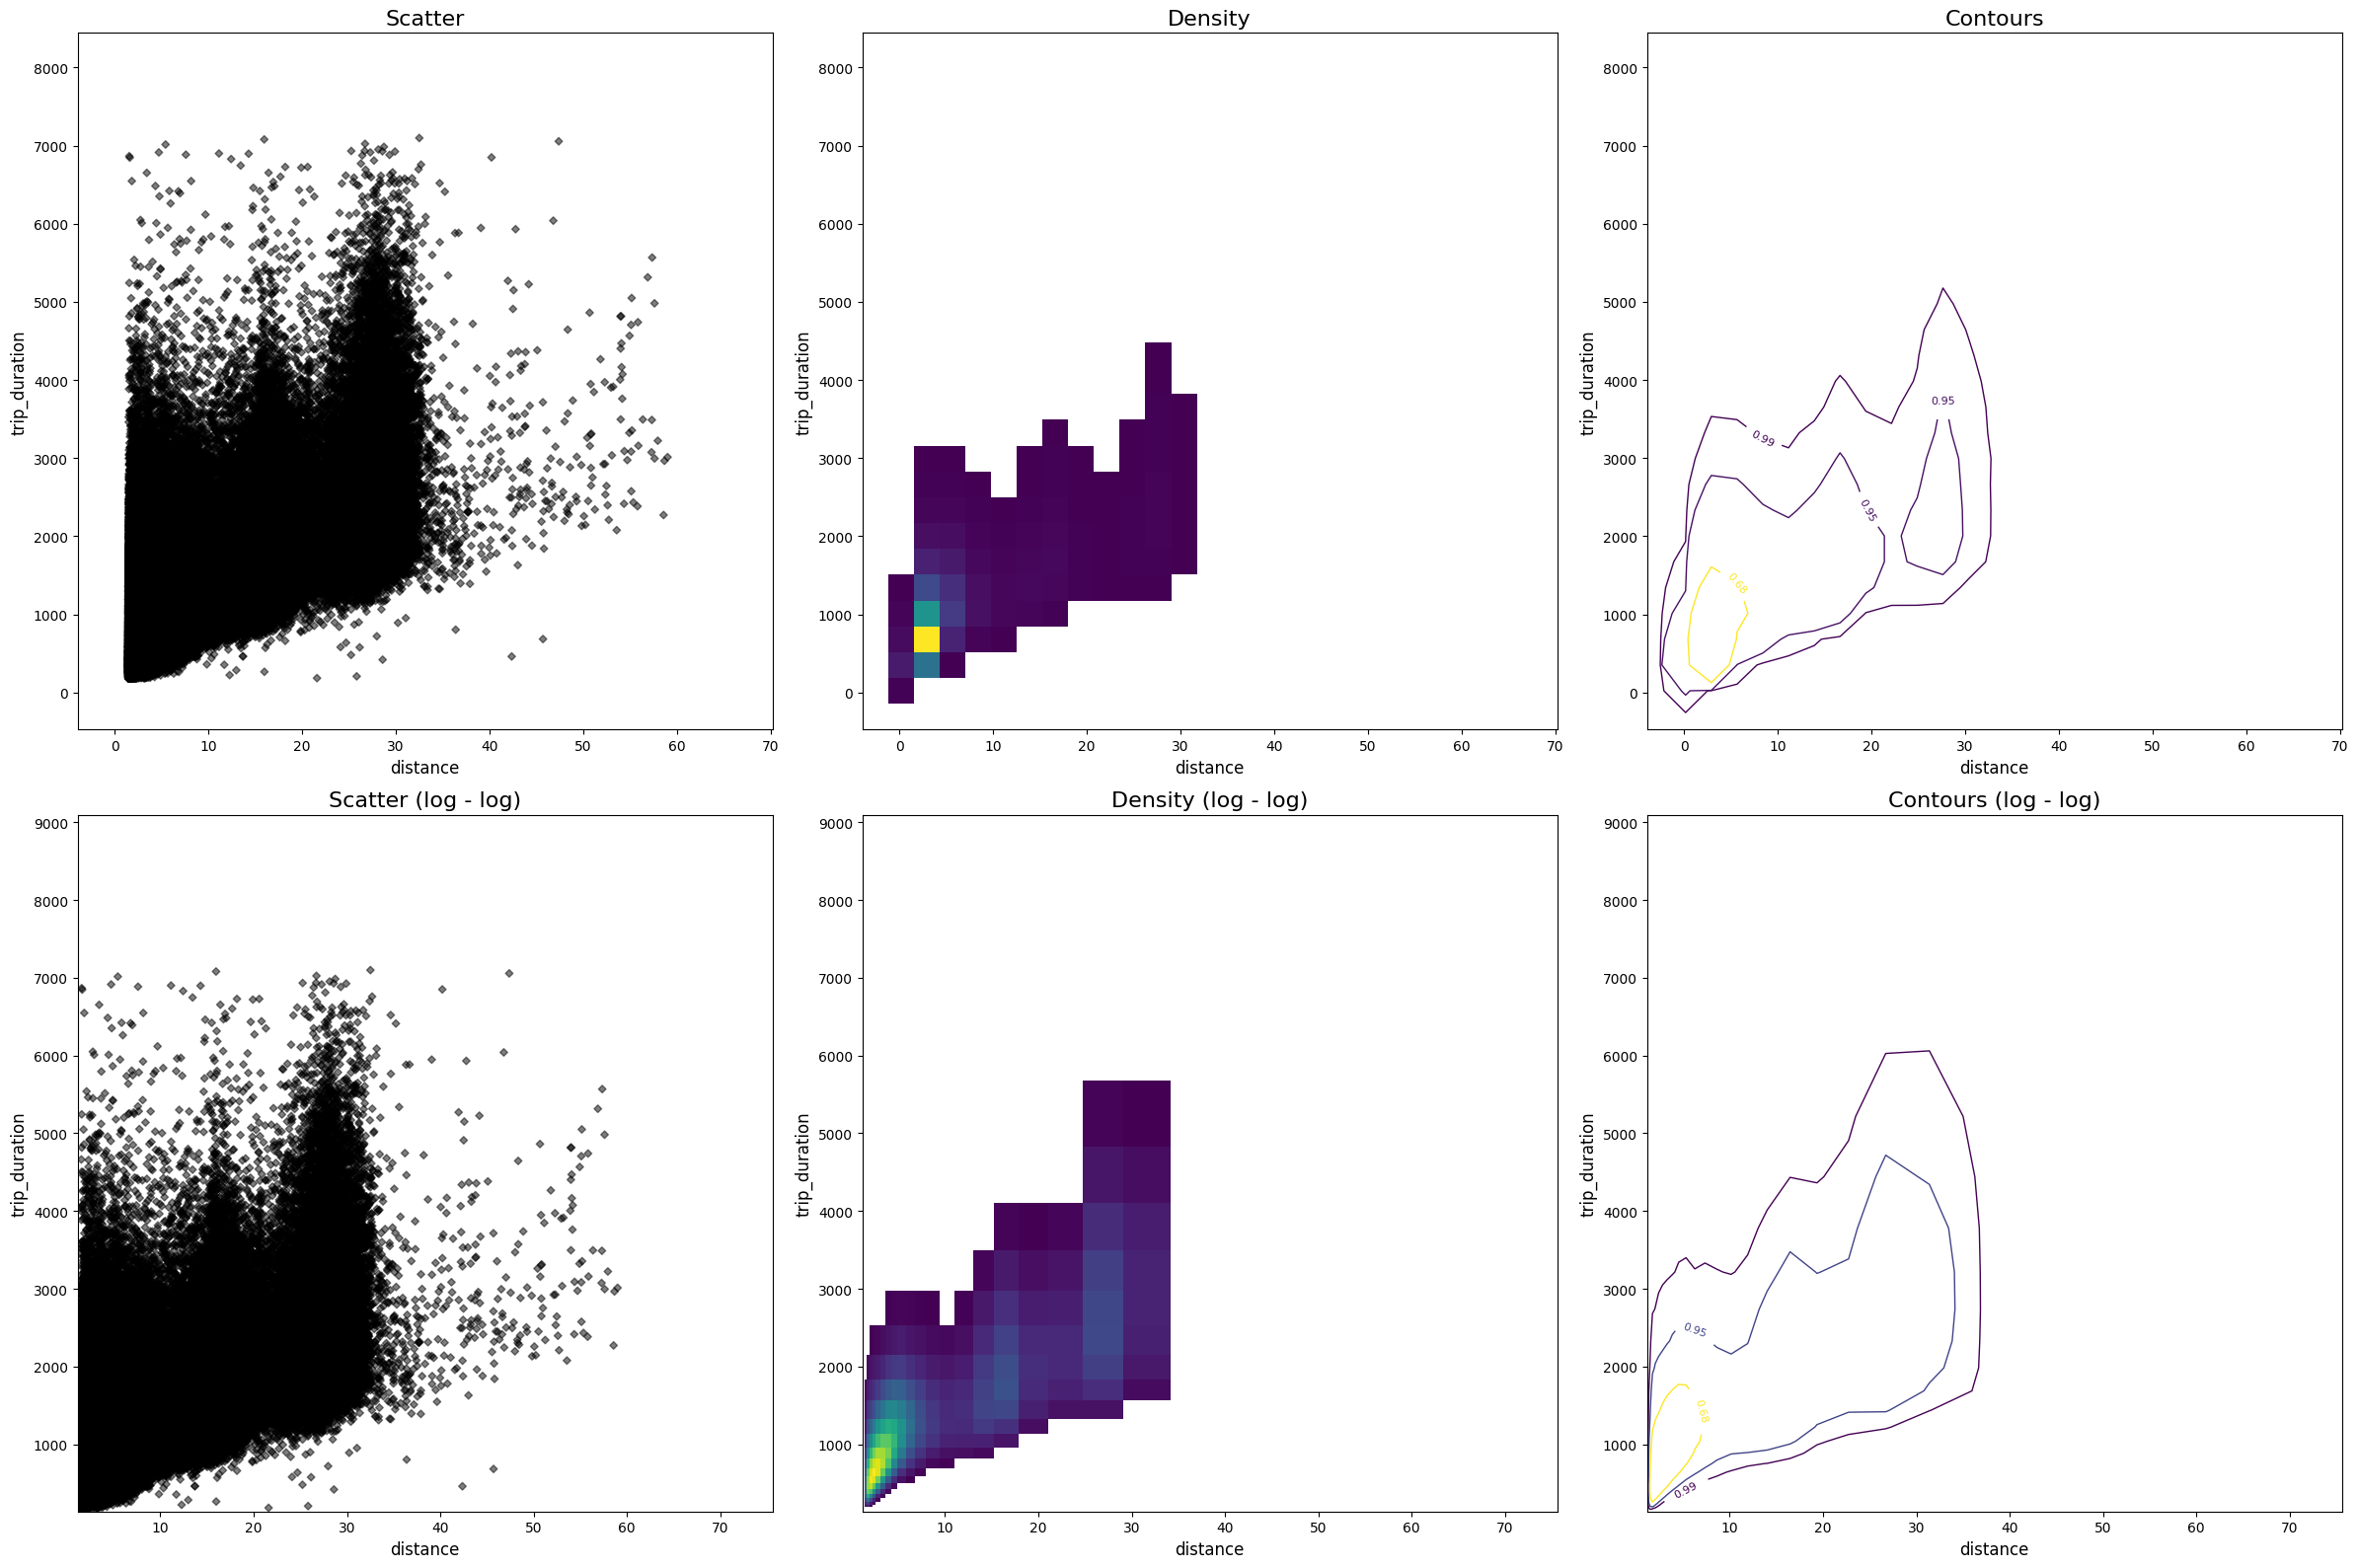

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(24, 16))

ax = ax.flat
share_axes(ax[:3], which="xy")
share_axes(ax[3:6], which="xy")
share_axes(ax[6:], which="xy")

contours = [0.68, 0.95, 0.99]
columns = ["distance", "trip_duration"]

# linear-scaled comparison
df_dist_trip_time.loc[:, columns].pyroplot.scatter(ax = ax[0], c = "k", s = 15, alpha = 0.5)
df_dist_trip_time.loc[:, columns].pyroplot.density(ax = ax[1])
df_dist_trip_time.loc[:, columns].pyroplot.density(ax = ax[2], contours = contours)

# log-scaled plots
df_dist_trip_time.loc[:, columns].pyroplot.scatter(ax = ax[3], c = "k", s = 15, alpha = 0.5)
df_dist_trip_time.loc[:, columns].pyroplot.density(ax = ax[4], logx = True, logy = True)
df_dist_trip_time.loc[:, columns].pyroplot.density(ax = ax[5], contours = contours, logx = True, logy = True)

# Title for each graph.
title = ["Scatter", "Density", "Contours"]

# Giving title for each graph.
for chart_title, a in zip(title + [i + " (log - log)" for i in title], ax):
    a.set_title(chart_title, fontsize=16)

plt.tight_layout()